# Database 3 - Merge DB1 & DB2

Qual a consistência dos dados obtidos nas duas fonted de dados?
Como se comportam os dados da DB1 quando agrupados com os rotulos Weather main da DB2?
Quais as correlações que podemos obter entre os dados obtidos pelas duas fontes de dados?


# Importação de bibliotecas

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
%matplotlib notebook
# Onde salvar as figuras
PROJECT_ROOT_DIR = r'C:\Users\André Tavares\Desktop'
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Carregamento e merge data

In [4]:
arquivo = pd.read_csv('C:/Users/André Tavares/Desktop/TCC/Open Weather/Weather18-20.csv')

In [5]:
arquivo2 = pd.read_csv('C:/Users/André Tavares/Desktop/TCC/Open Weather/solar18-20.csv')

In [6]:
arquivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23928 entries, 0 to 23927
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt_iso               23928 non-null  object 
 1   dt                   23928 non-null  int64  
 2   dt_iso.1             23928 non-null  object 
 3   timezone             23928 non-null  int64  
 4   city_name            23928 non-null  object 
 5   lat                  23928 non-null  float64
 6   lon                  23928 non-null  float64
 7   temp                 23928 non-null  float64
 8   feels_like           23928 non-null  float64
 9   temp_min             23928 non-null  float64
 10  temp_max             23928 non-null  float64
 11  pressure             23928 non-null  int64  
 12  humidity             23928 non-null  int64  
 13  wind_speed           23928 non-null  float64
 14  wind_deg             23928 non-null  int64  
 15  rain_1h              23928 non-null 

In [7]:
arquivo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23928 entries, 0 to 23927
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PeriodStart        23928 non-null  object 
 1   PeriodEnd          23928 non-null  object 
 2   Period             23928 non-null  object 
 3   AirTemp            23928 non-null  float64
 4   AlbedoDaily        23928 non-null  float64
 5   Azimuth            23928 non-null  int64  
 6   CloudOpacity       23928 non-null  float64
 7   DewpointTemp       23928 non-null  float64
 8   Dhi                23928 non-null  int64  
 9   Dni                23928 non-null  int64  
 10  Ebh                23928 non-null  int64  
 11  Ghi                23928 non-null  int64  
 12  GtiFixedTilt       23928 non-null  int64  
 13  GtiTracking        23928 non-null  int64  
 14  PrecipitableWater  23928 non-null  float64
 15  RelativeHumidity   23928 non-null  float64
 16  SurfacePressure    239

In [8]:
joined = pd.merge(arquivo, arquivo2, on=arquivo.dt_iso) #Junta os datasets

In [9]:
joined.set_index(pd.to_datetime(joined['dt_iso']), inplace=True) #Coloca o index padrão

# Feature engineering

In [10]:
joined[['dt_iso','PeriodStart']] #Conferir se o parse foi feito corretamente

,dt_iso,PeriodStart
dt_iso,,
2018-01-01 00:00:00,2018-01-01 00:00:00,2018-01-01 00:00:00+00:00
2018-01-01 01:00:00,2018-01-01 01:00:00,2018-01-01 01:00:00+00:00
2018-01-01 02:00:00,2018-01-01 02:00:00,2018-01-01 02:00:00+00:00
2018-01-01 03:00:00,2018-01-01 03:00:00,2018-01-01 03:00:00+00:00
2018-01-01 04:00:00,2018-01-01 04:00:00,2018-01-01 04:00:00+00:00
...,...,...
2020-09-23 19:00:00,2020-09-23 19:00:00,2020-09-23 19:00:00+00:00
2020-09-23 20:00:00,2020-09-23 20:00:00,2020-09-23 20:00:00+00:00
2020-09-23 21:00:00,2020-09-23 21:00:00,2020-09-23 21:00:00+00:00


In [11]:
atributos = ['key_0','dt_iso.1','PeriodStart','PeriodEnd','lat', 'timezone',
             'Period','weather_icon','lon','weather_id','dt','dt_iso']
for atributo in atributos:
    joined.pop(atributo)

In [12]:
df = joined.copy()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23928 entries, 2018-01-01 00:00:00 to 2020-09-23 23:00:00
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city_name            23928 non-null  object 
 1   temp                 23928 non-null  float64
 2   feels_like           23928 non-null  float64
 3   temp_min             23928 non-null  float64
 4   temp_max             23928 non-null  float64
 5   pressure             23928 non-null  int64  
 6   humidity             23928 non-null  int64  
 7   wind_speed           23928 non-null  float64
 8   wind_deg             23928 non-null  int64  
 9   rain_1h              23928 non-null  float64
 10  clouds_all           23928 non-null  int64  
 11  weather_main         23928 non-null  object 
 12  weather_description  23928 non-null  object 
 13  AirTemp              23928 non-null  float64
 14  AlbedoDaily          23928 non-null  float64
 15  A

In [14]:
df.describe()

,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,clouds_all,...,Ebh,Ghi,GtiFixedTilt,GtiTracking,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith
count,23928.000000,23928.000000,23928.000000,23928.000000,23928.000000,23928.000000,23928.000000,23928.000000,23928.000000,23928.000000,...,23928.000000,23928.000000,23928.000000,23928.000000,23928.000000,23928.000000,23928.000000,23928.000000,23928.000000,23928.000000
mean,21.504402,21.335973,18.887877,22.914463,1017.940488,65.307798,2.261959,123.955324,0.159792,49.817118,...,120.582456,210.021398,223.494191,255.131603,27.949248,73.264819,913.385381,125.304330,2.090914,90.986752
std,4.316942,4.764890,4.442946,4.389531,3.984565,17.438515,1.263613,84.916174,0.554126,37.169452,...,217.781456,292.640363,311.383652,340.317603,10.163014,17.712592,3.678715,91.308723,0.913804,44.636359
min,7.560000,5.910000,0.000000,9.100000,999.000000,12.000000,0.100000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,13.600000,900.900000,0.000000,0.000000,4.000000
25%,18.690000,18.090000,15.990000,20.000000,1015.000000,53.000000,1.400000,80.000000,0.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,19.500000,61.000000,910.700000,69.000000,1.500000,52.000000
50%,21.150000,21.490000,18.730000,22.500000,1018.000000,67.000000,2.100000,100.000000,0.000000,47.000000,...,0.000000,13.000000,13.500000,9.000000,27.700000,77.200000,913.600000,96.000000,2.000000,90.000000
75%,24.470000,24.520000,21.922500,26.000000,1021.000000,79.000000,3.000000,124.000000,0.000000,88.000000,...,147.000000,398.000000,421.000000,549.000000,36.600000,87.900000,916.000000,132.000000,2.600000,130.000000
max,35.150000,39.130000,33.130000,37.000000,1031.000000,100.000000,12.300000,360.000000,8.270000,100.000000,...,1021.000000,1115.000000,1087.000000,1121.000000,51.700000,100.000000,923.900000,360.000000,6.600000,175.000000


# Análise Exploratória

In [15]:
df.groupby('weather_main').mean()

,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,clouds_all,...,Ebh,Ghi,GtiFixedTilt,GtiTracking,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith
weather_main,,,,,,,,,,,,,,,,,,,,,
Clear,19.366572,18.269771,16.295159,20.916904,1020.241950,61.915140,2.190240,113.971713,0.000000,1.733144,...,145.820139,182.378758,212.273439,245.095179,18.517684,69.565362,914.189450,109.263298,1.951521,106.428038
Clouds,22.066267,21.965600,19.523916,23.435596,1017.917992,64.651794,2.346440,122.599807,0.000000,61.921710,...,122.103766,224.401432,233.354541,268.602837,29.168787,73.010370,913.521311,122.697032,2.144688,87.744405
Drizzle,20.597059,21.982941,18.999706,21.561176,1016.323529,91.911765,2.821471,111.411765,0.505294,82.794118,...,1.705882,193.088235,188.382353,193.647059,41.655882,87.585294,909.788235,140.294118,2.223529,47.794118
Fog,18.493333,20.020000,17.101667,19.330000,1014.666667,98.833333,2.075000,64.833333,0.000000,85.000000,...,0.833333,80.333333,79.833333,79.333333,37.433333,94.000000,908.100000,252.833333,2.266667,92.000000
Haze,23.810000,25.713333,22.616667,24.420000,1016.333333,72.000000,1.540000,296.666667,0.000000,65.666667,...,28.333333,353.333333,349.666667,359.000000,35.833333,67.766667,913.133333,291.666667,3.966667,34.666667
Mist,19.817368,21.619737,18.445789,20.897368,1015.815789,93.789474,1.941316,179.210526,0.000000,74.894737,...,48.921053,188.052632,196.184211,212.710526,37.894737,81.994737,909.255263,195.842105,1.613158,77.684211
Rain,22.550403,23.492894,20.326165,23.906185,1014.543910,72.126404,1.969182,141.807371,1.041938,75.184279,...,83.329398,206.753815,213.794702,230.692197,36.964469,79.469940,911.909070,158.796718,2.129197,79.282465
Thunderstorm,22.939783,23.779652,20.426261,24.459130,1015.100000,77.082609,3.085783,175.986957,0.816000,67.434783,...,3.995652,34.565217,33.369565,38.156522,41.293043,82.017391,908.799130,156.865217,1.554348,104.373913


In [16]:
df.groupby('weather_main').std()

,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,clouds_all,...,Ebh,Ghi,GtiFixedTilt,GtiTracking,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith
weather_main,,,,,,,,,,,,,,,,,,,,,
Clear,4.505247,4.556780,4.779320,4.502977,3.215204,17.962062,1.222976,64.928130,0.000000,2.806820,...,246.874174,291.611768,333.430291,364.002956,6.840495,18.355841,3.217154,67.241857,0.736622,43.265929
Clouds,4.173044,4.571850,4.195926,4.256469,3.674013,16.278059,1.266370,84.906829,0.000000,28.766646,...,214.887221,298.920529,310.468913,342.217298,8.724410,17.018696,3.759824,91.045181,0.923968,43.903239
Drizzle,1.532873,2.546586,2.178733,1.465946,3.470399,7.581347,1.062216,88.374931,0.760065,10.530704,...,6.331879,146.995850,143.358422,148.019221,6.371346,7.815375,3.910573,113.843468,1.132457,23.328717
Fog,1.945628,2.563388,2.493082,1.735869,3.204164,2.857738,0.868096,33.647684,0.000000,7.745967,...,2.041241,135.266650,131.368819,135.902416,9.433486,2.437212,3.480805,115.217042,1.284783,42.731721
Haze,0.529150,0.275015,1.853384,0.518845,1.154701,5.196152,0.000000,55.075705,0.000000,16.165808,...,45.654500,94.394562,98.286995,102.122475,3.008876,6.600253,0.929157,15.176737,0.404145,10.016653
Mist,2.229769,2.719297,2.227052,2.114837,2.129018,5.799151,0.800909,137.591082,0.000000,22.989762,...,124.452614,217.115979,232.586381,250.138654,7.637211,11.059543,2.739668,123.664657,0.775354,41.523100
Rain,3.488416,3.580463,3.192449,3.819998,3.866119,18.859179,1.208945,105.055329,1.040959,31.145480,...,176.946036,270.963031,284.081322,296.012135,8.265069,18.088125,3.408546,112.727482,1.080077,43.959560
Thunderstorm,2.688813,2.773253,2.140046,3.244843,2.301224,14.903977,1.831581,100.453969,1.032958,21.299130,...,20.644950,80.321584,77.457400,90.688448,5.196240,9.956414,2.643059,103.883644,0.853482,34.386821


# Análise por tendencia central

In [17]:
disc_df = df.copy()

In [18]:
atributos = ['Ghi','Dni','Dhi', 'Ebh','GtiFixedTilt','GtiTracking',
             'rain_1h','wind_deg','wind_speed','Azimuth', 'WindDirection10m',
            'WindSpeed10m']
for atributo in atributos:
    disc_df.pop(atributo)

In [19]:
groupedmean = disc_df.groupby('weather_main')

In [22]:
groupedmean['AirTemp','CloudOpacity','DewpointTemp','RelativeHumidity'].mean()

<ipython-input-22-d5a33ecd60b0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  groupedmean['AirTemp','CloudOpacity','DewpointTemp','RelativeHumidity'].mean()


,AirTemp,CloudOpacity,DewpointTemp,RelativeHumidity
weather_main,,,,
Clear,18.481196,3.676357,12.098203,69.565362
Clouds,21.168388,20.040728,15.619700,73.010370
Drizzle,20.511765,67.652941,18.291176,87.585294
Fog,18.933333,58.733333,17.933333,94.000000
Haze,23.300000,54.666667,16.966667,67.766667
Mist,20.576316,44.931579,17.257895,81.994737
Rain,21.754621,40.689346,17.490700,79.469940
Thunderstorm,22.109565,40.105217,18.761304,82.017391


In [28]:
groupedmean.sum()

,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,AirTemp,AlbedoDaily,Azimuth,CloudOpacity,DewpointTemp,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith
weather_main,,,,,,,,,,,,,,,,,,,,
Clear,108859.50,102694.38,91595.09,117573.92,5734780,348025,12311.34,640635,9742,103882.8,674.38,-59100,20664.8,68004.0,104087.9,391026.9,5138658.9,614169,10969.5,598232
Clouds,320468.39,319006.41,283545.83,340355.16,14783223,938938,34077.35,1780517,899289,307428.5,1753.68,-4437,291051.5,226844.9,423618.3,1060329.6,13267070.0,1781929,31147.3,1274312
Drizzle,700.30,747.42,645.99,733.08,34555,3125,95.93,3788,2815,697.4,4.19,-818,2300.2,621.9,1416.3,2977.9,30932.8,4770,75.6,1625
Fog,110.96,120.12,102.61,115.98,6088,593,12.45,389,510,113.6,0.72,-692,352.4,107.6,224.6,564.0,5448.6,1517,13.6,552
Haze,71.43,77.14,67.85,73.26,3049,216,4.62,890,197,69.9,0.36,137,164.0,50.9,107.5,203.3,2739.4,875,11.9,104
Mist,753.06,821.55,700.94,794.10,38601,3564,73.77,6810,2846,781.9,4.65,-2280,1707.4,655.8,1440.0,3115.8,34551.7,7442,61.3,2952
Rain,78317.55,81590.82,70592.77,83026.18,3523511,250495,6838.97,492497,261115,75553.8,426.14,64816,141314.1,60745.2,128377.6,275999.1,3167060.2,551501,7394.7,275348
Thunderstorm,5276.15,5469.32,4698.04,5625.60,233473,17729,709.73,40477,15510,5085.2,28.11,16496,9224.2,4315.1,9497.4,18864.0,209023.8,36079,357.5,24006


In [29]:
groupedmean.describe()

temp                                                       \
                count       mean       std    min      25%     50%     75%   
weather_main                                                                 
Clear          5621.0  19.366572  4.505247   7.56  16.0700  18.960  22.250   
Clouds        14523.0  22.066267  4.173044   9.23  19.2500  21.700  24.920   
Drizzle          34.0  20.597059  1.532873  16.57  19.9900  20.490  21.665   
Fog               6.0  18.493333  1.945628  14.65  18.6875  19.025  19.625   
Haze              3.0  23.810000  0.529150  23.21  23.6100  24.010  24.110   
Mist             38.0  19.817368  2.229769  14.97  19.0150  20.155  20.970   
Rain           3473.0  22.550403  3.488416  13.04  19.8800  21.900  25.390   
Thunderstorm    230.0  22.939783  2.688813  18.44  20.6850  22.535  24.835   

                    feels_like             ... WindSpeed10m        Zenith  \
                max      count       mean  ...          75%  max    count   
weather_main                               ...                              
Clear         35.15     5621.0  18.269771  ...        2.400  5.8   5621.0   
Clouds        34.28    14523.0  21.965600  ...        2.700  6.5  14523.0   
Drizzle       23.95       34.0  21.982941  ...        2.675  5.2     34.0   
Fog           19.86        6.0  20.020000  ...        3.350  3.8      6.0   
Haze          24.21        3.0  25.713333  ...        4.200  4.2      3.0   
Mist          24.38       38.0  21.619737  ...        1.800  3.9     38.0   
Rain          32.54     3473.0  23.492894  ...        2.800  6.6   3473.0   
Thunderstorm  31.63      230.0  23.779652  ...        1.900  4.9    230.0   

                                                                        
                    mean        std   min    25%    50%     75%    max  
weather_main                                                            
Clear         106.428038  43.265929   6.0  67.00  114.0  144.00  175.0  
Clouds         87.744405  43.903239   4.0  49.00   87.0  126.00  175.0  
Drizzle        47.794118  23.328717  10.0  31.00   40.5   64.25  104.0  
Fog            92.000000  42.731721  37.0  66.00   84.5  127.75  144.0  
Haze           34.666667  10.016653  25.0  29.50   34.0   39.50   45.0  
Mist           77.684211  41.523100  18.0  45.25   72.0  100.50  162.0  
Rain           79.282465  43.959560   4.0  41.00   75.0  118.00  175.0  
Thunderstorm  104.373913  34.386821   9.0  79.75  113.0  132.00  165.0  

[8 rows x 160 columns]

<IPython.core.display.Javascript object>


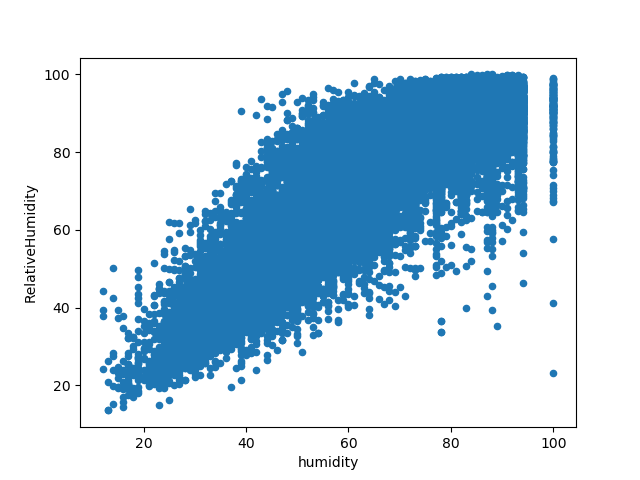

In [30]:
df.plot(kind='scatter',x='humidity',y='RelativeHumidity')

<IPython.core.display.Javascript object>


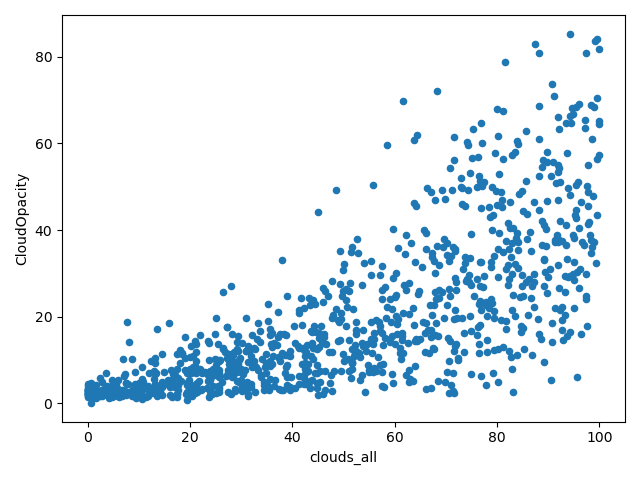

Saving figure CloudOpacity por cloudsall


In [110]:
df.resample('D').mean().plot(kind='scatter',y='CloudOpacity',x='clouds_all')
save_fig("CloudOpacity por cloudsall")

In [76]:
df['CloudOpacity'].plot

# Análise por agregação

In [36]:
agr_an = df[['Ghi','Dni','Dhi', 'Ebh','weather_main']]
agr_an.resample('D').sum()

,Ghi,Dni,Dhi,Ebh
dt_iso,,,,
2018-01-01,5741,2723,3554,2187
2018-01-02,5223,1825,3864,1358
2018-01-03,5465,2008,3642,1822
2018-01-04,1015,0,1015,0
2018-01-05,3324,1024,2432,890
...,...,...,...,...
2020-09-19,6951,8016,1293,5657
2020-09-20,6192,6368,1343,4849
2020-09-21,3598,1682,2780,818


In [37]:
grouped_agr_df = agr_an.groupby('weather_main').sum()
grouped_agr_df

,Ghi,Dni,Dhi,Ebh
weather_main,,,,
Clear,1025151,1385640,205465,819655
Clouds,3258982,2649883,1485636,1773313
Drizzle,6565,71,6507,58
Fog,482,55,477,5
Haze,1060,105,975,85
Mist,7146,3253,5289,1859
Rain,718056,403002,428620,289403
Thunderstorm,7950,2026,7031,919


<IPython.core.display.Javascript object>


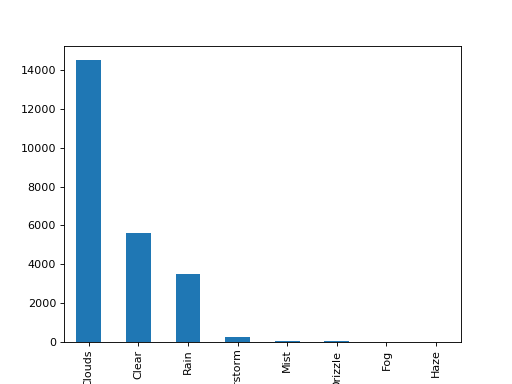

In [38]:
agr_an['weather_main'].value_counts().plot(kind='bar')#justifica a predominância dos valores maiores em "clouds"

In [29]:
contagens = pd.Series(agr_an['weather_main'].value_counts())
contagens

Clouds          14523
Clear            5621
Rain             3473
Thunderstorm      230
Mist               38
Drizzle            34
Fog                 6
Haze                3
Name: weather_main, dtype: int64

In [39]:
agr_an.groupby('weather_main').mean()

,Ghi,Dni,Dhi,Ebh
weather_main,,,,
Clear,182.378758,246.511297,36.553104,145.820139
Clouds,224.401432,182.461131,102.295394,122.103766
Drizzle,193.088235,2.088235,191.382353,1.705882
Fog,80.333333,9.166667,79.500000,0.833333
Haze,353.333333,35.000000,325.000000,28.333333
Mist,188.052632,85.605263,139.184211,48.921053
Rain,206.753815,116.038583,123.414915,83.329398
Thunderstorm,34.565217,8.808696,30.569565,3.995652


Discutir um pouco a respeito das ocilaçõess de Ghi Dni e Dhi e as variações climáticas

In [32]:
grouped_agr_df

,Ghi,Dni,Dhi,Ebh,GtiFixedTilt,GtiTracking,rain_1h
weather_main,,,,,,,
Clear,1025151,1385640,205465,819655,1193189,1377680,0.00
Clouds,3258982,2649883,1485636,1773313,3389008,3900919,0.00
Drizzle,6565,71,6507,58,6405,6584,17.18
Fog,482,55,477,5,479,476,0.00
Haze,1060,105,975,85,1049,1077,0.00
Mist,7146,3253,5289,1859,7455,8083,0.00
Rain,718056,403002,428620,289403,742509,801194,3618.65
Thunderstorm,7950,2026,7031,919,7675,8776,187.68


In [31]:
df.head()

,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,...,Ebh,Ghi,GtiFixedTilt,GtiTracking,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith
dt_iso,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,Belo Horizonte,21.28,23.78,20.02,22.0,1016,84,0.7,342,0.64,...,0,0,0,0,40.6,92.0,914.2,317,1.2,124
2018-01-01 01:00:00,Belo Horizonte,20.84,23.49,19.50,21.7,1016,89,0.8,355,0.34,...,0,0,0,0,40.1,91.4,914.1,315,1.2,132
2018-01-01 02:00:00,Belo Horizonte,21.16,23.85,19.60,22.0,1016,86,0.6,39,0.82,...,0,0,0,0,39.6,90.8,914.1,313,1.2,136
2018-01-01 03:00:00,Belo Horizonte,20.92,23.88,18.38,22.0,1016,88,0.3,16,0.11,...,0,0,0,0,39.2,90.8,913.8,306,1.2,136
2018-01-01 04:00:00,Belo Horizonte,20.79,23.93,18.25,22.0,1015,91,0.3,348,0.97,...,0,0,0,0,38.9,91.4,913.1,295,1.2,131


In [95]:
corr_mat

,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,clouds_all,...,Ebh,Ghi,GtiFixedTilt,GtiTracking,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith
temp,1.000000,0.942708,0.962762,0.988442,0.487430,0.639894,0.202643,0.135990,0.137320,0.131656,...,0.367229,0.499688,0.463914,0.469662,0.320239,0.577557,0.301184,0.139397,0.146885,0.545913
feels_like,0.942708,1.000000,0.933620,0.925223,0.605839,0.387728,0.025529,0.176641,0.172319,0.255085,...,0.263762,0.408804,0.363749,0.371078,0.523059,0.364444,0.361520,0.213174,0.025676,0.488653
temp_min,0.962762,0.933620,1.000000,0.939323,0.502096,0.547194,0.158381,0.142415,0.153706,0.197869,...,0.382512,0.521003,0.485435,0.495172,0.369884,0.539092,0.278753,0.160226,0.160526,0.571111
temp_max,0.988442,0.925223,0.939323,1.000000,0.478996,0.659815,0.195699,0.136602,0.139485,0.108855,...,0.377587,0.506325,0.472927,0.480005,0.287887,0.597296,0.282036,0.134019,0.136838,0.554917
pressure,0.487430,0.605839,0.502096,0.478996,1.000000,0.006690,0.182556,0.209903,0.371368,0.308669,...,0.136851,0.059332,0.101271,0.072918,0.581356,0.048070,0.615724,0.254139,0.092193,0.091869
humidity,0.639894,0.387728,0.547194,0.659815,0.006690,1.000000,0.274743,0.013412,0.014564,0.268791,...,0.414226,0.441858,0.448719,0.438961,0.382117,0.838834,0.038608,0.048317,0.232495,0.354797
wind_speed,0.202643,0.025529,0.158381,0.195699,0.182556,0.274743,1.000000,0.108141,0.034688,0.052825,...,0.213668,0.246973,0.246317,0.252937,0.085700,0.245853,0.017168,0.175825,0.424926,0.259473
wind_deg,0.135990,0.176641,0.142415,0.136602,0.209903,0.013412,0.108141,1.000000,0.084750,0.082633,...,0.025369,0.026203,0.024221,0.016217,0.125562,0.030975,0.196684,0.423368,0.038381,0.095645
rain_1h,0.137320,0.172319,0.153706,0.139485,0.371368,0.014564,0.034688,0.084750,1.000000,0.139743,...,0.002114,0.045087,0.045765,0.031408,0.203370,0.005931,0.137699,0.118007,0.026050,0.121476
clouds_all,0.131656,0.255085,0.197869,0.108855,0.308669,0.268791,0.052825,0.082633,0.139743,1.000000,...,0.172995,0.043806,0.076492,0.086402,0.590349,0.252511,0.138332,0.131883,0.067243,0.132509


# Descobrindo as correlações

In [45]:
corr_mat = df.corr()

In [46]:
def get_atributes(df):#Extrai os atributos
    atr_list = []
    for atribute in df.columns:
        atr_list.append(atribute)
    return atr_list

In [47]:
list_atr = get_atributes(corr_mat)

In [101]:
def squares_fit(atr,df):#Eleva ao quadrado
    for atributo in atr:
        df[atributo] = df[atributo]**(2)
        df[atributo] = df[atributo]**(0.5)
    return df

In [102]:
corr_mat2 = corr_mat.copy()

In [103]:
squares_fit(list_atr, corr_mat)

,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,clouds_all,...,Ebh,Ghi,GtiFixedTilt,GtiTracking,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith
temp,1.000000,0.942708,0.962762,0.988442,0.487430,0.639894,0.202643,0.135990,0.137320,0.131656,...,0.367229,0.499688,0.463914,0.469662,0.320239,0.577557,0.301184,0.139397,0.146885,0.545913
feels_like,0.942708,1.000000,0.933620,0.925223,0.605839,0.387728,0.025529,0.176641,0.172319,0.255085,...,0.263762,0.408804,0.363749,0.371078,0.523059,0.364444,0.361520,0.213174,0.025676,0.488653
temp_min,0.962762,0.933620,1.000000,0.939323,0.502096,0.547194,0.158381,0.142415,0.153706,0.197869,...,0.382512,0.521003,0.485435,0.495172,0.369884,0.539092,0.278753,0.160226,0.160526,0.571111
temp_max,0.988442,0.925223,0.939323,1.000000,0.478996,0.659815,0.195699,0.136602,0.139485,0.108855,...,0.377587,0.506325,0.472927,0.480005,0.287887,0.597296,0.282036,0.134019,0.136838,0.554917
pressure,0.487430,0.605839,0.502096,0.478996,1.000000,0.006690,0.182556,0.209903,0.371368,0.308669,...,0.136851,0.059332,0.101271,0.072918,0.581356,0.048070,0.615724,0.254139,0.092193,0.091869
humidity,0.639894,0.387728,0.547194,0.659815,0.006690,1.000000,0.274743,0.013412,0.014564,0.268791,...,0.414226,0.441858,0.448719,0.438961,0.382117,0.838834,0.038608,0.048317,0.232495,0.354797
wind_speed,0.202643,0.025529,0.158381,0.195699,0.182556,0.274743,1.000000,0.108141,0.034688,0.052825,...,0.213668,0.246973,0.246317,0.252937,0.085700,0.245853,0.017168,0.175825,0.424926,0.259473
wind_deg,0.135990,0.176641,0.142415,0.136602,0.209903,0.013412,0.108141,1.000000,0.084750,0.082633,...,0.025369,0.026203,0.024221,0.016217,0.125562,0.030975,0.196684,0.423368,0.038381,0.095645
rain_1h,0.137320,0.172319,0.153706,0.139485,0.371368,0.014564,0.034688,0.084750,1.000000,0.139743,...,0.002114,0.045087,0.045765,0.031408,0.203370,0.005931,0.137699,0.118007,0.026050,0.121476
clouds_all,0.131656,0.255085,0.197869,0.108855,0.308669,0.268791,0.052825,0.082633,0.139743,1.000000,...,0.172995,0.043806,0.076492,0.086402,0.590349,0.252511,0.138332,0.131883,0.067243,0.132509


In [51]:
def optimum(df, atr):
    resultados={}
    for atributo in atr:
        result = df[atributo].sort_values(ascending=False)
        resultado1 = list(result[1:5])
        index = list(result[1:5].index)
        resultado = resultado1 + index
        resultados.setdefault(atributo, resultado)
    return resultados

In [104]:
corr_mat2 = squares_fit(list_atr, corr_mat2)

In [68]:
def mapeamento(df, atr):
    big={}
    for atributo in atr:
        resultados=[]
        result = df[atributo].sort_values(ascending=False)
        index = list(result.index)
        for resultado in range(1,5):
            resultados.append(str('{0} + {1}'.format(result[resultado],index[resultado])))
        big.setdefault(atributo, resultados)
    return big

In [105]:
pd.DataFrame(mapeamento(corr_mat2, list_atr))

,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,clouds_all,...,Ebh,Ghi,GtiFixedTilt,GtiTracking,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith
0,0.9884421553191145 + temp_max,0.9427077456244285 + temp,0.9627619671290033 + temp,0.9884421553191145 + temp,0.6157242224076722 + SurfacePressure,0.8388338311680587 + RelativeHumidity,0.42492557280326027 + WindSpeed10m,0.4233678447530252 + WindDirection10m,0.37136783228035775 + pressure,0.5903487024998257 + PrecipitableWater,...,0.9447157829189027 + Dni,0.9911793706276272 + GtiFixedTilt,0.9911793706276272 + Ghi,0.9672865511306354 + Ghi,0.8670866935944584 + DewpointTemp,0.8388338311680587 + humidity,0.6157242224076722 + pressure,0.4233678447530252 + wind_deg,0.42492557280326027 + wind_speed,0.811524160662504 + Ghi
1,0.9627619671290033 + temp_min,0.9336204122408623 + temp_min,0.939323129524156 + temp_max,0.939323129524156 + temp_min,0.6058385290295357 + feels_like,0.6598148900665455 + temp_max,0.2747432797403685 + humidity,0.20990256857697584 + pressure,0.21621444702667802 + CloudOpacity,0.5275508041803508 + CloudOpacity,...,0.9236748463254538 + GtiFixedTilt,0.9672865511306354 + GtiTracking,0.9639167850228458 + GtiTracking,0.9639167850228458 + GtiFixedTilt,0.5903487024998257 + clouds_all,0.6470332589708324 + AirTemp,0.4035518820735063 + PrecipitableWater,0.25413865151285625 + pressure,0.28349823272668884 + Dhi,0.797702041638007 + GtiFixedTilt
2,0.9427077456244285 + feels_like,0.9252229436830544 + temp_max,0.9354304675289311 + AirTemp,0.9252229436830544 + feels_like,0.5813559068239557 + PrecipitableWater,0.639893704251579 + temp,0.25947306327965347 + Zenith,0.19668375366824092 + SurfacePressure,0.20337026362542743 + PrecipitableWater,0.4988656822918512 + DewpointTemp,...,0.9121667159112484 + Ghi,0.9121667159112484 + Ebh,0.9236748463254538 + Ebh,0.9120687048008929 + Dni,0.5813559068239557 + pressure,0.5972964373319113 + temp_max,0.3615197264649697 + feels_like,0.23909620446774646 + SurfacePressure,0.26174497381453676 + Zenith,0.7934178483841671 + GtiTracking
3,0.9281028375340515 + AirTemp,0.8875719730132624 + AirTemp,0.9336204122408623 + feels_like,0.9218622245281921 + AirTemp,0.5257076444763956 + DewpointTemp,0.5527604054193622 + AirTemp,0.2529372913660995 + GtiTracking,0.17664117104931498 + feels_like,0.17231942172314238 + feels_like,0.3086687429072266 + pressure,...,0.901862315204239 + GtiTracking,0.8494847687065008 + Dni,0.879538374799264 + Dni,0.901862315204239 + Ebh,0.5567148560290771 + CloudOpacity,0.585318452241962 + GtiFixedTilt,0.3011842531889146 + temp,0.2131739396168785 + feels_like,0.24307040324148774 + Ghi,0.7740695085854704 + Dhi


<IPython.core.display.Javascript object>


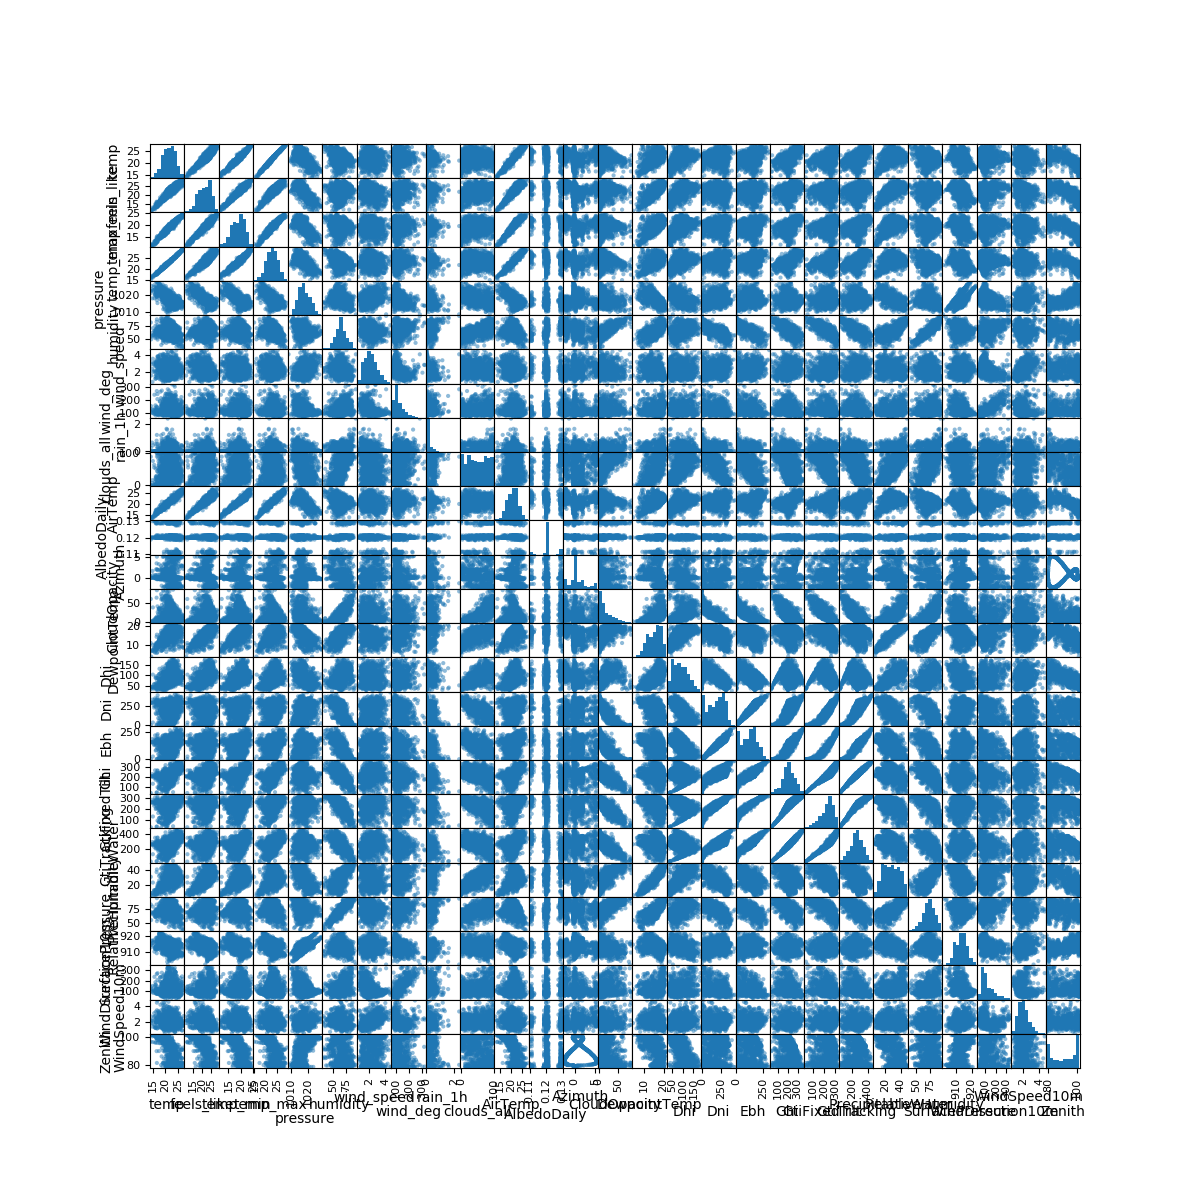

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E47D695250>,
      dtype=object)

In [72]:
atributos = ['temp','airtemp']
from pandas.plotting import scatter_matrix
scatter_matrix(df[list_atr].resample('D').mean(), figsize=(12,12))

In [142]:
res = optimum(corr_mat2, list_atr)

In [145]:
resp = pd.DataFrame(res)

In [146]:
resp

,dt,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,...,Ebh,Ghi,GtiFixedTilt,GtiTracking,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith
0,0.472645,0.988442,0.942708,0.962762,0.988442,0.615724,0.838834,0.424926,0.423368,0.371368,...,0.944716,0.991179,0.991179,0.967287,0.867087,0.838834,0.615724,0.423368,0.424926,0.811524
1,0.251083,0.962762,0.93362,0.939323,0.939323,0.605839,0.659815,0.274743,0.209903,0.216214,...,0.923675,0.967287,0.963917,0.963917,0.590349,0.647033,0.472645,0.254139,0.283498,0.797702
2,0.240872,0.942708,0.925223,0.93543,0.925223,0.581356,0.639894,0.259473,0.196684,0.20337,...,0.912167,0.912167,0.923675,0.912069,0.581356,0.597296,0.403552,0.239096,0.261745,0.793418
3,0.21602,0.928103,0.887572,0.93362,0.921862,0.525708,0.55276,0.252937,0.176641,0.172319,...,0.901862,0.849485,0.879538,0.901862,0.556715,0.585318,0.36152,0.213174,0.24307,0.77407
4,SurfacePressure,temp_max,temp,temp,temp,SurfacePressure,RelativeHumidity,WindSpeed10m,WindDirection10m,pressure,...,Dni,GtiFixedTilt,Ghi,Ghi,DewpointTemp,humidity,pressure,wind_deg,wind_speed,Ghi
5,clouds_all,temp_min,temp_min,temp_max,temp_min,feels_like,temp_max,humidity,pressure,CloudOpacity,...,GtiFixedTilt,GtiTracking,GtiTracking,GtiFixedTilt,clouds_all,AirTemp,dt,pressure,Dhi,GtiFixedTilt
6,wind_speed,feels_like,temp_max,AirTemp,feels_like,PrecipitableWater,temp,Zenith,SurfacePressure,PrecipitableWater,...,Ghi,Ebh,Ebh,Dni,pressure,temp_max,PrecipitableWater,SurfacePressure,Zenith,GtiTracking
7,DewpointTemp,AirTemp,AirTemp,feels_like,AirTemp,DewpointTemp,AirTemp,GtiTracking,feels_like,feels_like,...,GtiTracking,Dni,Dni,Ebh,CloudOpacity,GtiFixedTilt,feels_like,feels_like,Ghi,Dhi


In [25]:
df['pressure'].plot.hist() # Posso comparar esse resultado do dataset com os 24 anos de dados

<IPython.core.display.Javascript object>


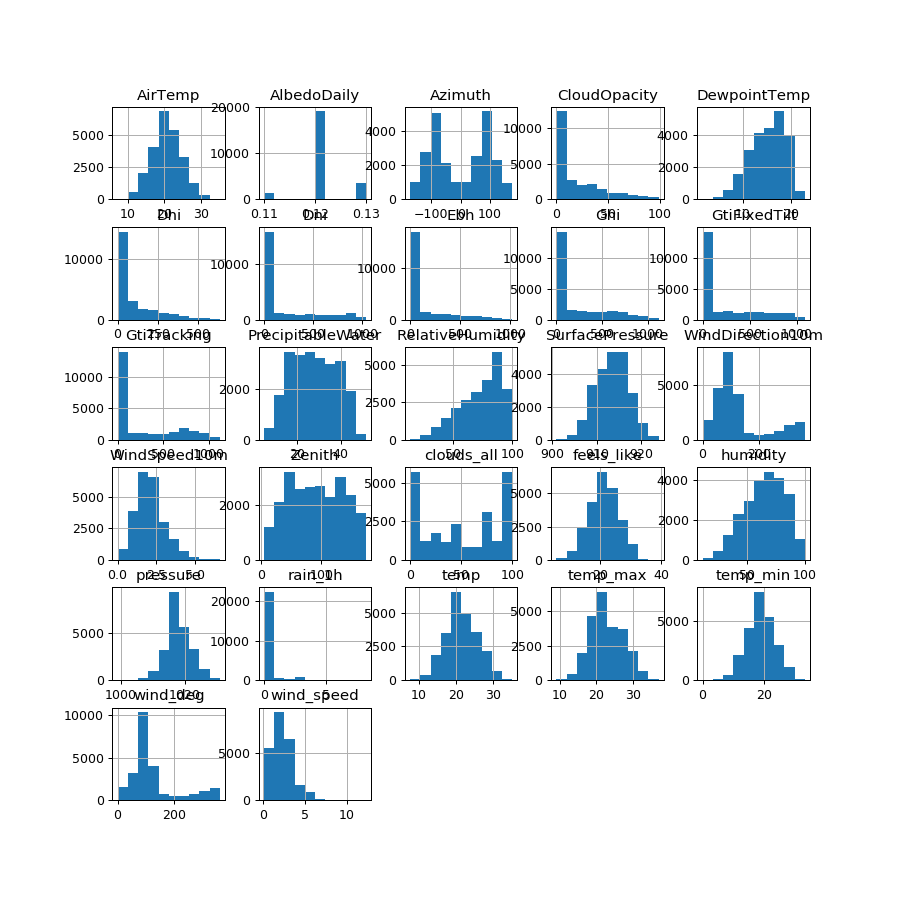

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018D085D28B0>,
      dtype=object)

In [20]:
df.hist(figsize=(10,10))

<IPython.core.display.Javascript object>


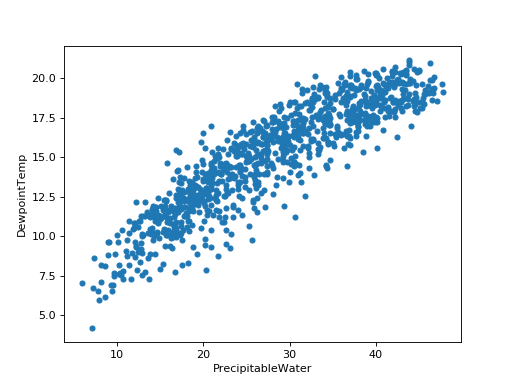

In [40]:
df.resample('D').mean().plot(kind='scatter',x='PrecipitableWater', y='DewpointTemp')

Traçar correlaçoes entre atributos como atributos medidos e adquiridos por plataformas diefrentes (Surface Pressure, pressure),((Humidity e Relative Humidity)